# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
train=pd.read_excel(r"C:\Users\Vicky\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.xlsx")
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


# Importing Test Data

In [3]:
test=pd.read_excel(r"C:\Users\Vicky\Downloads\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.xlsx")
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
#Checking shape of data.
print(train.shape,test.shape)

(5961, 7) (1987, 6)


In [5]:
#Checking Train Data types
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [6]:
#Checking Test Data Types.
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In train data we try to find is there any null value present and what is the types of data.

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In Test data we try to find is there any null value present and how much null value is present.

In [9]:
pd.concat({'unique values': train.apply(pd.unique), 'number of unique values': train.nunique()}, axis=1)

,unique values,number of unique values
Qualification,"[BHMS, MD - Homeopathy, BAMS, MD - Ayurveda Me...",1420
Experience,"[24 years experience, 12 years experience, 9 y...",64
Rating,"[100%, 98%, nan, 99%, 79%, 95%, 97%, 94%, 88%,...",51
Place,"[Kakkanad, Ernakulam, Whitefield, Bangalore, M...",877
Profile,"[Homeopath, Ayurveda, ENT Specialist, Dentist,...",6
Miscellaneous_Info,"[100% 16 Feedback Kakkanad, Ernakulam, 98% 76 ...",2998
Fees,"[100, 350, 300, 250, 200, 700, 500, 400, 150, ...",40


Here we are finding all features unique values and how many unique values are there. As we are getting, all features have categorical or string data types.

In [10]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

As we are getting the null values is present in train data.

In [11]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

As we are getting the null values is present in test data.

<AxesSubplot:>

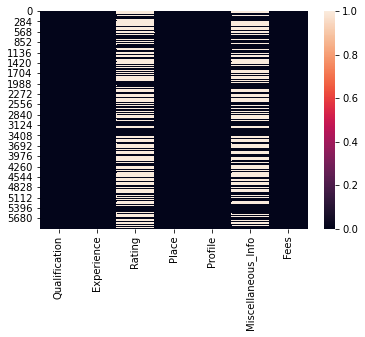

In [12]:
sns.heatmap(train.isnull())

<AxesSubplot:>

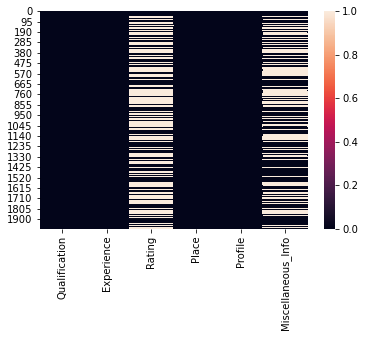

In [13]:
sns.heatmap(test.isnull())

Try to visualize null values with the help of heatmap.

In [14]:
train.drop(['Miscellaneous_Info'],axis=1,inplace=True)
test.drop(['Miscellaneous_Info'],axis=1,inplace=True)

Here we are droping Miscellaneous column because the details of miscellaneous column already present in Rating and Place columns.

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
train['Rating']=imp.fit_transform(train['Rating'].values.reshape(-1,1))
train['Place']=imp.fit_transform(train['Place'].values.reshape(-1,1))
#test
test['Rating']=imp.fit_transform(test['Rating'].values.reshape(-1,1))
test['Place']=imp.fit_transform(test['Place'].values.reshape(-1,1))

With the help of Most frequent(Mode) functionality we are replacing null values from both datasets.

In [16]:
train.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [17]:
test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

After apply Mode functionality No null values are present in our both datasets.

# Feature Engg.

In [18]:
train['Rating'].fillna('0%',inplace=True)

In [19]:
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [20]:
for i in range(len(train)):
    train['Experience'][i]=train['Experience'][i][:-17]
    
train['Experience']=train['Experience'].astype(int)

In [21]:
train['Rating']=train['Rating']*0.1 

As we see with experience(numerical) some text data is present that's why we are Slicing the Experience and Rating Columns.

In [22]:
test['Rating'].fillna('0%',inplace=True)

In [23]:
test['Rating']=test['Rating'].str.slice(stop=-1).astype(int)

In [24]:
for i in range(len(test)):
    test['Experience'][i]=test['Experience'][i][:-17]
    
test['Experience']=test['Experience'].astype(int)

In [25]:
test['Rating']=test['Rating']*0.1

As we see with experience(numerical) some text data is present that's why we are Slicing the Experience and Rating Columns.

In [26]:
train['Place'].fillna('missing, missing', inplace = True)
place_split = train['Place'].str.split(', ', expand = True)
train['Area'] = place_split[0]
train['City'] = place_split[1]

For better prediction here we are spliting Place column into two columns Area and City

In [27]:
train.drop(columns = 'Place', axis =1, inplace = True)

In [28]:
train.drop(columns = 'Area', axis =1, inplace = True)

After spliting the place columns from dataset know i am droping the Place and Area Columns

In [29]:
test['Place'].fillna('missing, missing', inplace = True)
place_split = test['Place'].str.split(', ', expand = True)
test['Area'] = place_split[0]
test['City'] = place_split[1]

For better prediction here we are spliting Place column into two columns Area and City

In [30]:
test.drop(columns = 'Place', axis =1, inplace = True)

In [31]:
test.drop(columns = 'Area', axis =1, inplace = True)

After spliting the place columns from dataset know i am droping the Place and Area Columns

In [32]:
train['Rating'].unique()

array([10. ,  9.8,  9.9,  7.9,  9.5,  9.7,  9.4,  8.8,  9. ,  8. ,  9.3,
        3.6,  7.8,  8.7,  9.6,  8.2,  8.9,  7.4,  8.6,  9.2,  8.3,  7.6,
        8.5,  5.6,  9.1,  6.8,  6. ,  7.5,  6.9,  7.3,  6.7,  7.7,  3.3,
        5.5,  7.1,  8.4,  4.5,  6.3,  7.2,  8.1,  6.2,  5.7,  0.7,  4.8,
        4. ,  7. ,  6.4,  6.5,  4.7,  5.8,  5.3])

Checking unique values in Rating Column.

In [33]:
train['Rating'] = train['Rating'].replace('10. ', '10')
train['Rating'] = train['Rating'].replace('9. ', '9')
train['Rating'] = train['Rating'].replace('8. ', '8')
train['Rating'] = train['Rating'].replace('6. ', '9')
train['Rating'] = train['Rating'].replace('4. ', '4')
train['Rating'] = train['Rating'].replace('7. ', '7')

Some values have extra space so we are replacing manually.

# Statistical Summary

In [34]:
train.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,9.761064,307.944640
std,11.142798,0.588154,190.920373
min,0.000000,0.700000,5.000000
25%,9.000000,9.800000,150.000000
50%,14.000000,10.000000,300.000000
75%,23.000000,10.000000,500.000000
max,66.000000,10.000000,950.000000


Here we are analysing the all numerical features statistically and as we are seeing here all numerical features describing with count,mean,std,minm,25%,50%, 75% and max.

# Data Visualization

# Correlation

<AxesSubplot:>

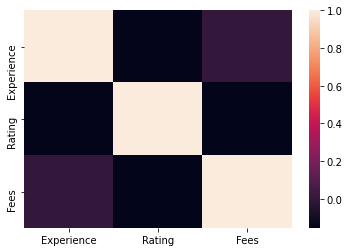

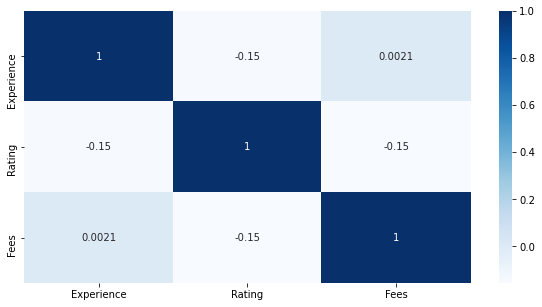

In [35]:
dfcor=train.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(10,5))
sns.heatmap(dfcor,cmap='Blues',annot=True)

As we see the target variable is postive correlated with experience and negative correlated with rating.

# Univariate Analysis

Text(0.5, 1.0, 'Experience')

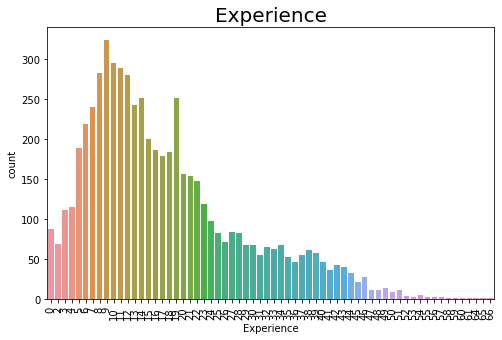

In [36]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=train, x="Experience")
plt.xticks(rotation=90)
plt.title("Experience", fontsize = 20)

Maximum doctors have experice between 5 to 20 years, as we are getting from countplot.

Text(0.5, 1.0, 'Rating')

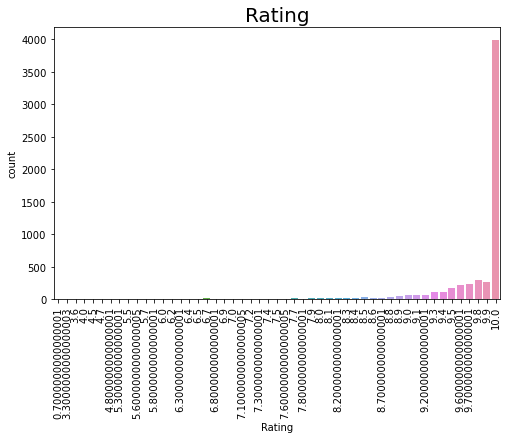

In [37]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=train, x="Rating")
plt.xticks(rotation=90)
plt.title("Rating", fontsize = 20)

Maximum Doctors got 10 rating as we counted from data.

Text(0.5, 1.0, 'Fees')

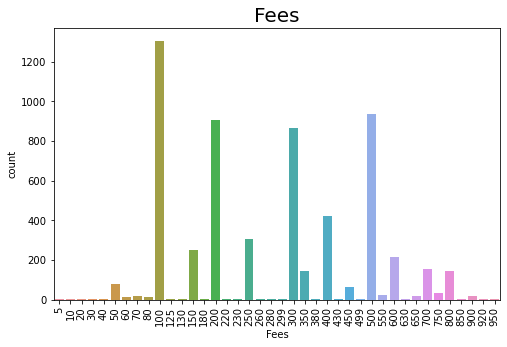

In [38]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=train, x="Fees")
plt.xticks(rotation=90)
plt.title("Fees", fontsize = 20)

According to above plot, there are 100 is the highest consultation fees and 200,300 and 500 are second highest consultation fees.

# Bivariate Analysis

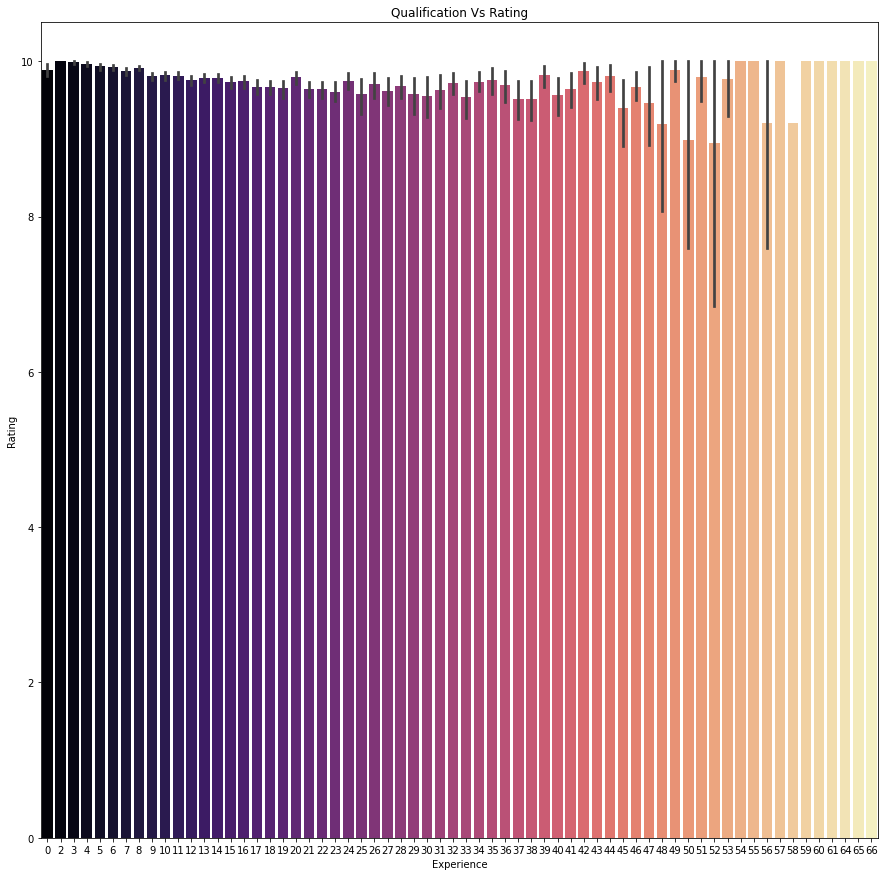

In [39]:
plt.figure(figsize=(15,15))
sns.barplot(x='Experience',y='Rating',data=train,palette='magma')
plt.title("Qualification Vs Rating")
plt.show()

As we are getting the highest Experice is not related with highest rating because as we can see low experience have also high rating.

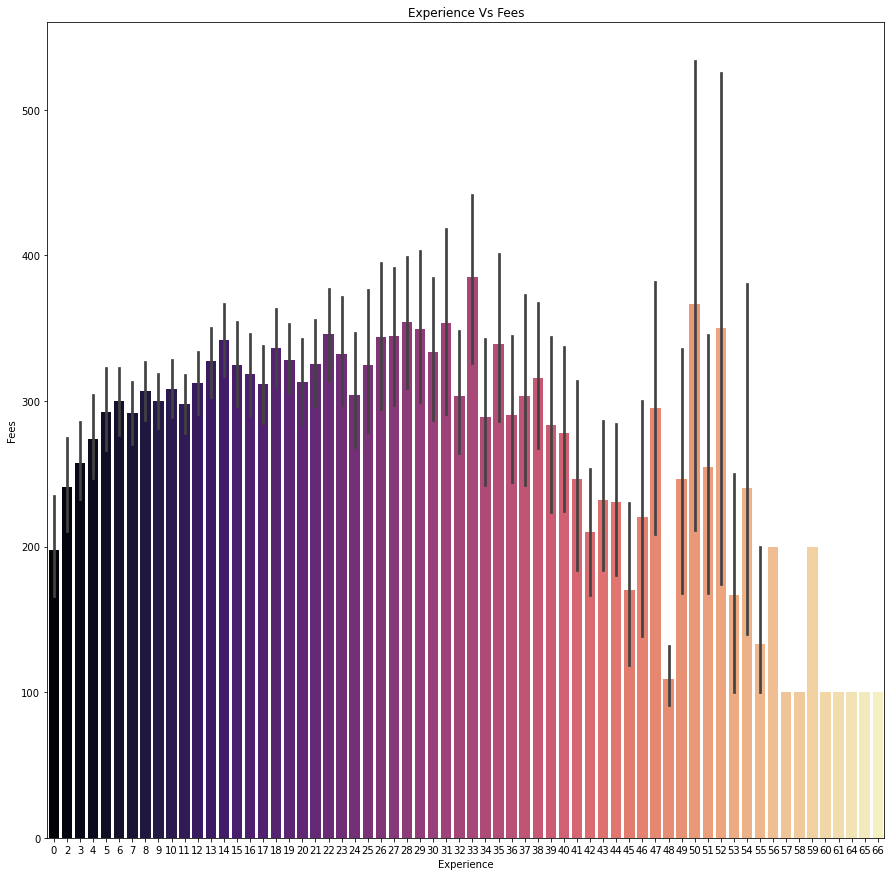

In [40]:
plt.figure(figsize=(15,15))
sns.barplot(x='Experience',y='Fees',data=train,palette='magma')
plt.title("Experience Vs Fees")
plt.show()

As we can see the doctors have experience between 12 to 35 charging highest consultation fees but some Doctors have experience above 48 years and they are charging highest fees and some have experience 50+ but they are not charging highest fees.

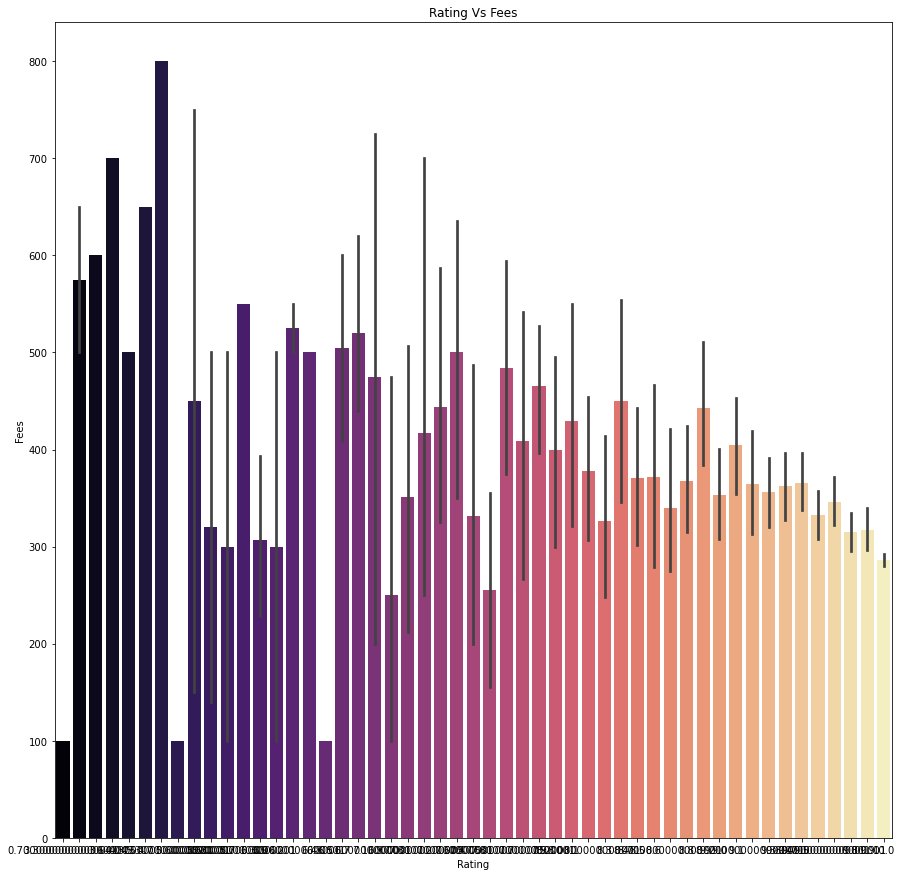

In [41]:
plt.figure(figsize=(15,15))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Fees")
plt.show()

As, we can see that High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high

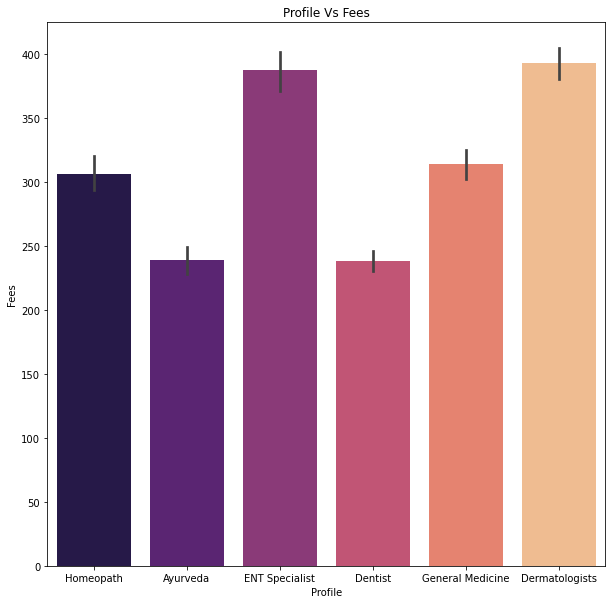

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x='Profile',y='Fees',data=train,palette='magma')
plt.title("Profile Vs Fees")
plt.show()

Doctors who have ENT Specialist and Dermatologists charging highest consultation fees and Homeopath and General Medicine charging second highest Fees.

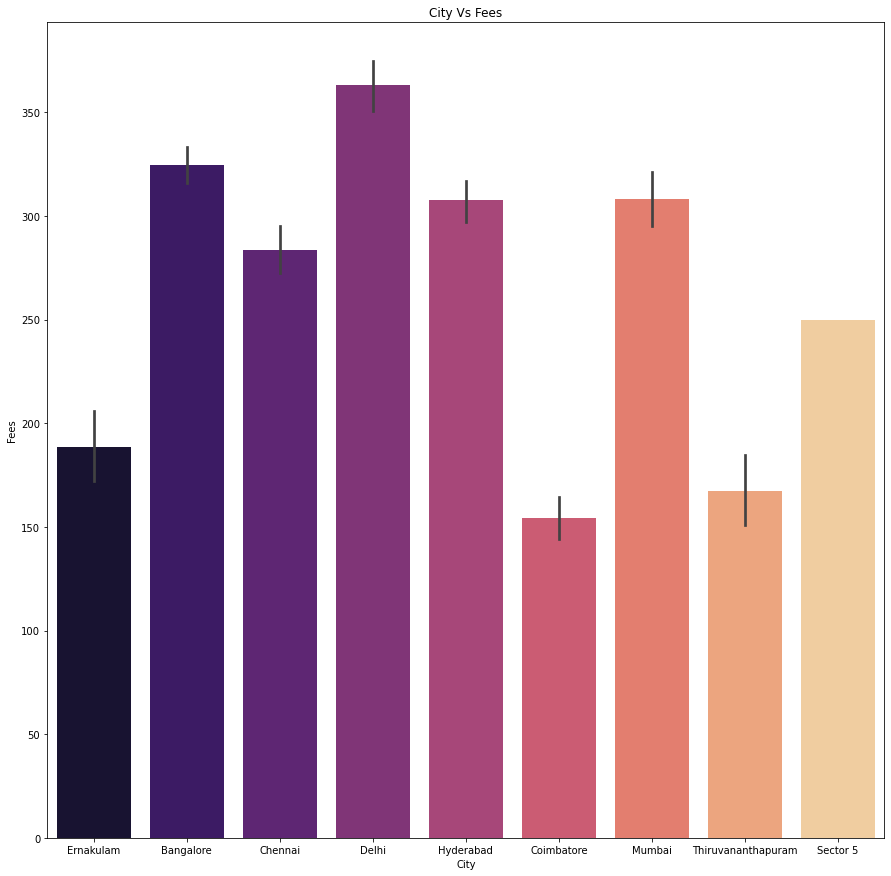

In [43]:
plt.figure(figsize=(15,15))
sns.barplot(x='City',y='Fees',data=train,palette='magma')
plt.title("City Vs Fees")
plt.show()

Here we are trying to analyse Fees with City. The Doctors of Delhi, Bangalore, Hyderabad, Mumbai and Chennai are charging highest Consultation Fees as compare to others cities.

# Multivariate Analysis

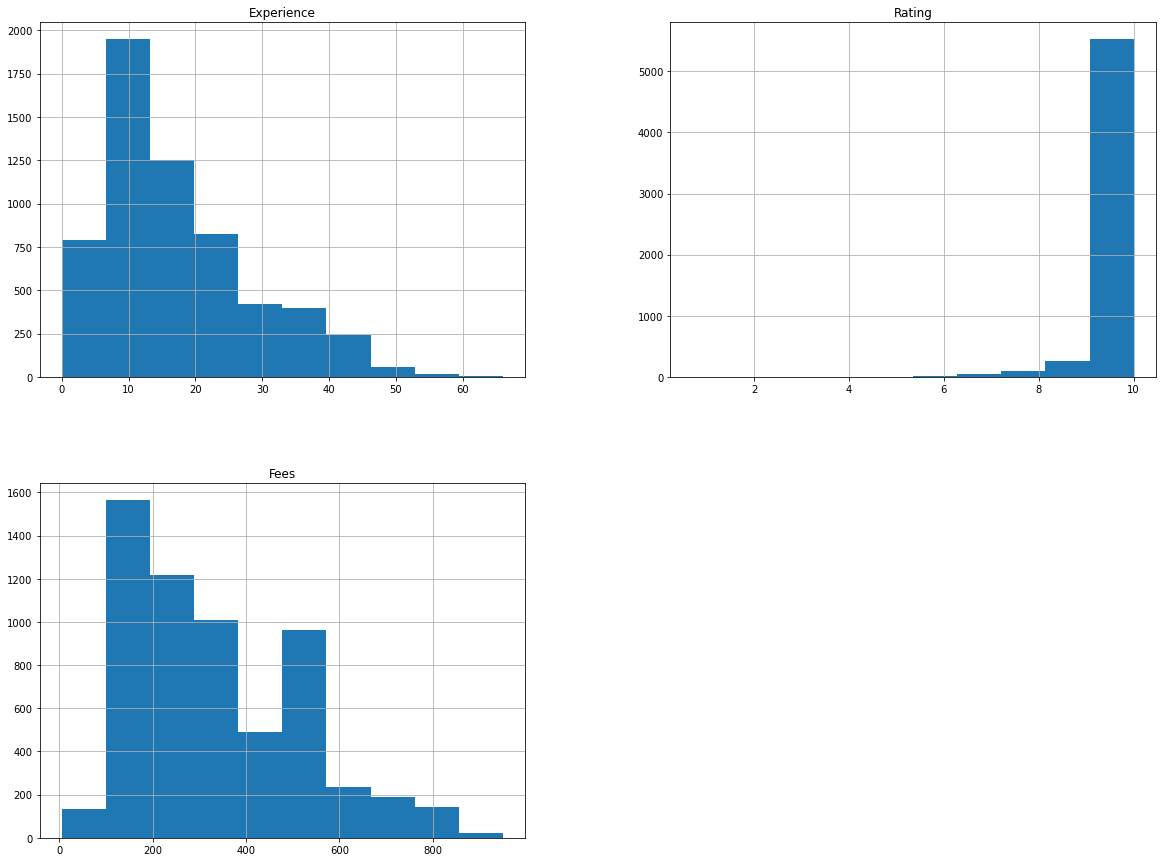

In [44]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
train.hist(ax=ax)
plt.show()

# Data Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#train data encoding
train['Profile'] = labelencoder.fit_transform(train['Profile'])
train['City'] = labelencoder.fit_transform(train['City'])
#test data encoding
test['Profile'] = labelencoder.fit_transform(test['Profile'])
test['City'] = labelencoder.fit_transform(test['City'])


# Feature Engg. with Qualification column in Train Data

In [46]:
train['Qualification']=train['Qualification'].str.split(",")
train['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ..., list(['MBBS']),
       list(['MBBS', ' MD - General Medicine']),
       list(['BDS', ' MDS - Orthodontics'])], dtype=object)

In [47]:
Qual={}
for x in train['Qualification'].values:
    for each in x:
        each=each.strip()
        if each in Qual:
            Qual[each]+=1
            
        else:
            Qual[each]=1

In [48]:
most_qual=sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual

[('MBBS', 2808),
 ('BDS', 1363),
 ('BAMS', 764),
 ('BHMS', 749),
 ('MD - Dermatology', 606),
 ('MS - ENT', 411),
 ('Venereology & Leprosy', 297),
 ('MD - General Medicine', 285),
 ('Diploma in Otorhinolaryngology (DLO)', 250),
 ('MD - Homeopathy', 181)]

In [49]:
final_qual=[]
for q in most_qual:
    final_qual.append(q[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [50]:
for q in final_qual:
    train[q]=0
        
for x,y in zip(train['Qualification'].values,np.array([i for i in range(len(train))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            train[c][y]=1

In [51]:
train.drop(columns='Qualification',axis=1,inplace=True)


In [52]:
train

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10.0,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,9.8,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,10.0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,10.0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,10.0,0,250,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,19,9.8,3,300,0,1,0,0,0,0,1,0,0,0,0
5957,33,10.0,4,100,1,1,0,0,0,0,0,0,0,0,0
5958,41,9.7,4,600,3,1,0,0,0,0,0,0,0,0,0
5959,15,9.0,4,100,6,1,0,0,0,0,0,0,1,0,0


# Feature Engg. with Qualification column in Test Data

In [53]:
test['Qualification']=test['Qualification'].str.split(",")
test['Qualification'].values

array([list(['MBBS']),
       list(['MBBS', ' Diploma in Otorhinolaryngology (DLO)']),
       list(['MBBS', ' DDVL']), ...,
       list(['MBBS', ' MD / MS - Obstetrics & Gynaecology']),
       list(['BDS']),
       list(['MBBS', ' MD - Dermatology ', ' Venereology & Leprosy'])],
      dtype=object)

In [54]:
Qual={}
for x in test['Qualification'].values:
    for each in x:
        each=each.strip()
        if each in Qual:
            Qual[each]+=1
            
        else:
            Qual[each]=1

In [55]:
most_qual=sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
most_qual

[('MBBS', 980),
 ('BDS', 428),
 ('BHMS', 249),
 ('BAMS', 243),
 ('MD - Dermatology', 196),
 ('MS - ENT', 128),
 ('MD - General Medicine', 99),
 ('Venereology & Leprosy', 91),
 ('Diploma in Otorhinolaryngology (DLO)', 85),
 ('DDVL', 67)]

In [56]:
final_qual=[]
for q in most_qual:
    final_qual.append(q[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [57]:
for q in final_qual:
    test[q]=0
        
for x,y in zip(test['Qualification'].values,np.array([i for i in range(len(test))])):
    for c in x:
        c=c.strip()
        if c in final_qual:
            test[c][y]=1

In [58]:
test.drop(columns='Qualification',axis=1,inplace=True)


In [59]:
test

,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,10.0,4,6,1,0,0,0,0,0,0,0,0,0
1,31,10.0,3,5,1,0,0,0,0,0,0,0,1,0
2,40,7.0,2,1,1,0,0,0,0,0,0,0,0,1
3,0,10.0,0,3,0,0,0,1,0,0,0,0,0,0
4,16,10.0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,10.0,0,0,0,0,0,1,0,0,0,0,0,0
1983,4,10.0,2,1,1,0,0,0,1,0,0,1,0,0
1984,9,10.0,4,1,1,0,0,0,0,0,0,0,0,0
1985,12,9.8,1,0,0,1,0,0,0,0,0,0,0,0


# Spliting the Independent and Target Variables.

In [60]:
x=train.drop('Fees',axis=1)
y=train['Fees']

# Data Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x.loc[:,'Experience':'Rating'] = scale.fit_transform(x.loc[:,'Experience':'Rating'])
x

,Experience,Rating,Profile,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,0.363636,1.000000,5,4,0,0,0,1,0,0,0,0,0,1
1,0.181818,0.978495,0,0,0,0,1,0,0,0,0,0,0,0
2,0.136364,1.000000,3,0,1,0,0,0,0,0,0,0,0,0
3,0.181818,1.000000,0,0,0,0,1,0,0,0,0,0,0,0
4,0.303030,1.000000,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,0.287879,0.978495,3,0,1,0,0,0,0,1,0,0,0,0
5957,0.500000,1.000000,4,1,1,0,0,0,0,0,0,0,0,0
5958,0.621212,0.967742,4,3,1,0,0,0,0,0,0,0,0,0
5959,0.227273,0.892473,4,6,1,0,0,0,0,0,0,1,0,0


In [62]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
test.loc[:,'Experience':'Rating'] = scale.fit_transform(test.loc[:,'Experience':'Rating'])
test

,Experience,Rating,Profile,City,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,0.538462,1.000000,4,6,1,0,0,0,0,0,0,0,0,0
1,0.476923,1.000000,3,5,1,0,0,0,0,0,0,0,1,0
2,0.615385,0.375000,2,1,1,0,0,0,0,0,0,0,0,1
3,0.000000,1.000000,0,3,0,0,0,1,0,0,0,0,0,0
4,0.246154,1.000000,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,0.153846,1.000000,0,0,0,0,0,1,0,0,0,0,0,0
1983,0.061538,1.000000,2,1,1,0,0,0,1,0,0,1,0,0
1984,0.138462,1.000000,4,1,1,0,0,0,0,0,0,0,0,0
1985,0.184615,0.958333,1,0,0,1,0,0,0,0,0,0,0,0


# Finding best Random State for train test split.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = r2_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.14414721421657017  on Random State  396


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=396)

# Linear Regression

In [65]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
lr.coef_

array([ -53.05437628, -220.90291723,  -15.06530169,   -0.65884812,
         71.10791744,  -67.40560576,  -74.49445119,   47.14464714,
         30.37238198,   58.03550583,    2.67574994,   12.58136168,
        -41.7972261 ,   53.02600329])

In [67]:
lr.score(x_train,y_train)

0.10337336423005083

In [68]:
pred=lr.predict(x_test)
print('Predicted Result Price:',pred)
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [241.87967954 345.89068239 334.97346776 ... 297.63142798 238.84548782
 399.98374133]
error:
Mean absolute error: 146.1140382027896
Mean squared error: 32022.01388018047
Root Mean Squared error: 178.94695828703115
0.14414721421657017


# Applying all Algorithms combinedly

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=396)
model=[KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor()]

for m in model:
    m.fit(train_x,train_y)
    m_y=m.predict(test_x)
    print("Score of Model",m,"is",m.score(train_x,train_y))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(test_y,m_y))
    print("Root Mean Squared Error", (mean_squared_error(test_y,m_y))**0.5 )
    print("*******************************************************************")
    print("\n\n")

Score of Model KNeighborsRegressor() is 0.3514387869254372

Error
Mean Absolute Error 144.13314700950252
Root Mean Squared Error 187.54750922601167
*******************************************************************



Score of Model SVR() is 0.0233850814014388

Error
Mean Absolute Error 149.7079749350565
Root Mean Squared Error 189.55292442599944
*******************************************************************



Score of Model RandomForestRegressor() is 0.6752367701387239

Error
Mean Absolute Error 146.0979331094152
Root Mean Squared Error 190.90541670664962
*******************************************************************



Score of Model AdaBoostRegressor() is 0.11908338523516115

Error
Mean Absolute Error 150.03126892546587
Root Mean Squared Error 180.47882082106187
*******************************************************************



Score of Model GradientBoostingRegressor() is 0.23134070570059673

Error
Mean Absolute Error 138.09687532556694
Root Mean Squared Error 172.7

# Checking Cross Validation to remove over fiting and under fiting cases

In [71]:
from sklearn.model_selection import cross_val_score
model=[KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor()]
for m in model:
    cvs=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Cross val score of',m,'is:')
    print('Cross val score is',cvs)
    print('Mean cross val score of',m,'is',cvs.mean())
    print('Standard deviation of',m,'is',cvs.std())
    print('\n')

Cross val score of KNeighborsRegressor() is:
Cross val score is [0.00298727 0.01470879 0.07799127 0.06363896 0.07115518]
Mean cross val score of KNeighborsRegressor() is 0.04609629515682132
Standard deviation of KNeighborsRegressor() is 0.030972713768222866


Cross val score of SVR() is:
Cross val score is [ 0.02569692  0.01399234  0.03550493 -0.00672526  0.03863411]
Mean cross val score of SVR() is 0.021420608689684782
Standard deviation of SVR() is 0.01649441450090298


Cross val score of RandomForestRegressor() is:
Cross val score is [-0.06055436  0.00507836  0.00845165  0.03079287 -0.02476668]
Mean cross val score of RandomForestRegressor() is -0.008199631212322034
Standard deviation of RandomForestRegressor() is 0.03158946241736751


Cross val score of AdaBoostRegressor() is:
Cross val score is [0.10169223 0.12478207 0.12358721 0.10495129 0.10545079]
Mean cross val score of AdaBoostRegressor() is 0.11209272012244446
Standard deviation of AdaBoostRegressor() is 0.009964219336834014

In [ ]:
import numpy as np
a = np.array(test)
predicted = np.array(m)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

In [ ]:
plt.scatter(x=test, y=m, color = "blue")
plt.plot(y_test,y_test, color='r')
plt.xlabel("Actual", fontsize =20)
plt.ylabel("Predicted", fontsize=20)
plt.title("The predicted model plot", fontsize=20)
plt.show()

# Saving Model

In [ ]:
import joblib
joblib.dump(lasso,'baseball.obj')